In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Salary.csv')
df.head()

# data preprocessing

# set target variable
# values.reshape turns the column into a 2D array
y = df['Salary'].values.reshape(-1, 1)
X = df.drop(columns=['Salary'])

# enumerating columns with strings
# gender_enum = enumerate(df['Gender'].unique())
# job_title_enum = enumerate(df['Job Title'].unique())
# country_title_enum = enumerate(df['Country'].unique())
# race_title_enum = enumerate(df['Race'].unique())

# exploratory data analysis

# data is not standardized

In [3]:
df.head

<bound method NDFrame.head of        Age  Gender  Education Level              Job Title  \
0     32.0    Male                1      Software Engineer   
1     28.0  Female                2           Data Analyst   
2     45.0    Male                3                Manager   
3     36.0  Female                1        Sales Associate   
4     52.0    Male                2               Director   
...    ...     ...              ...                    ...   
6679  49.0  Female                3  Director of Marketing   
6680  32.0    Male                0        Sales Associate   
6681  30.0  Female                1      Financial Manager   
6682  46.0    Male                2      Marketing Manager   
6683  26.0  Female                0        Sales Executive   

      Years of Experience    Salary    Country        Race  Senior  
0                     5.0   90000.0         UK       White       0  
1                     3.0   65000.0        USA    Hispanic       0  
2                 

In [4]:
## Data Understanding
# dataset statistics.
print("X shapes: ", X.shape)
print("y shapes: ", y.shape)
print(df.describe())
print("\n")

# attribute counts and their datatypes.
print(df.info())

X shapes:  (6684, 8)
y shapes:  (6684, 1)
               Age  Education Level  Years of Experience         Salary  \
count  6684.000000      6684.000000          6684.000000    6684.000000   
mean     33.610563         1.622382             8.077723  115307.175194   
std       7.595994         0.880474             6.029305   52806.810881   
min      21.000000         0.000000             0.000000     350.000000   
25%      28.000000         1.000000             3.000000   70000.000000   
50%      32.000000         1.000000             7.000000  115000.000000   
75%      38.000000         2.000000            12.000000  160000.000000   
max      62.000000         3.000000            34.000000  250000.000000   

            Senior  
count  6684.000000  
mean      0.143477  
std       0.350585  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (tot

In [5]:
# unique elements
print("Job titles: ", df['Job Title'].value_counts())
print("Countries: ", df['Country'].value_counts())
print("Races: ", df['Race'].value_counts())

Job titles:  Job Title
Software Engineer                   809
Data Scientist                      515
Data Analyst                        391
Software Engineer Manager           376
Product Manager                     323
                                   ... 
Director of Human Capital             1
Advertising Coordinator               1
Account Executive                     1
Director of Business Development      1
Social Media Man                      1
Name: count, Length: 129, dtype: int64
Countries:  Country
USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: count, dtype: int64
Races:  Race
White               1957
Asian               1599
Korean               457
Australian           452
Chinese              443
Black                435
African American     352
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64


In [6]:
# eliminating columns with strings and the column with the target variable
#X = df.drop(columns=['Gender', 'Job Title', 'Salary', 'Country', 'Race'])
# TEST: One-hot encoding
from sklearn.preprocessing import OneHotEncoder
df = df.drop(columns=['Job Title'])
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")

Encoded Employee data : 
       Age  Education Level  Years of Experience    Salary  Senior  \
0     32.0                1                  5.0   90000.0       0   
1     28.0                2                  3.0   65000.0       0   
2     45.0                3                 15.0  150000.0       1   
3     36.0                1                  7.0   60000.0       0   
4     52.0                2                 20.0  200000.0       0   
...    ...              ...                  ...       ...     ...   
6679  49.0                3                 20.0  200000.0       0   
6680  32.0                0                  3.0   50000.0       0   
6681  30.0                1                  4.0   55000.0       0   
6682  46.0                2                 14.0  140000.0       0   
6683  26.0                0                  1.0   35000.0       0   

      Gender_Female  Gender_Male  Country_Australia  Country_Canada  \
0               0.0          1.0                0.0            

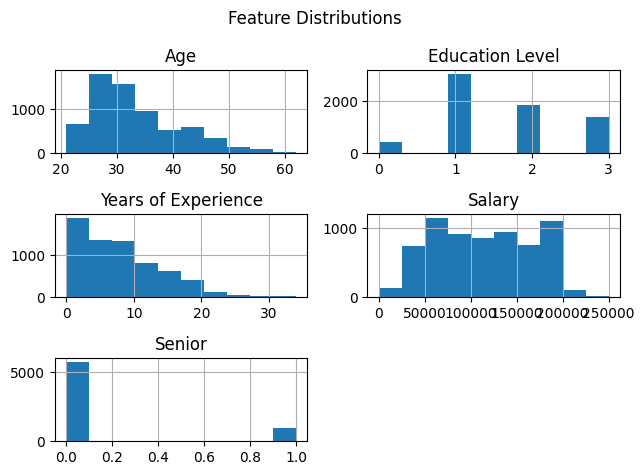

In [7]:
#histagram istribution.
df.hist()

plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

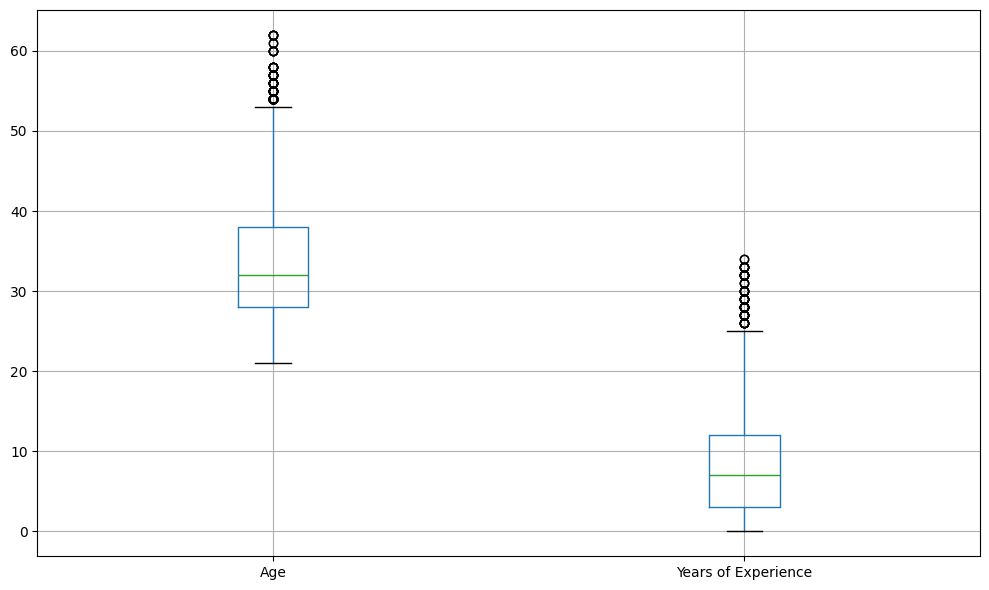

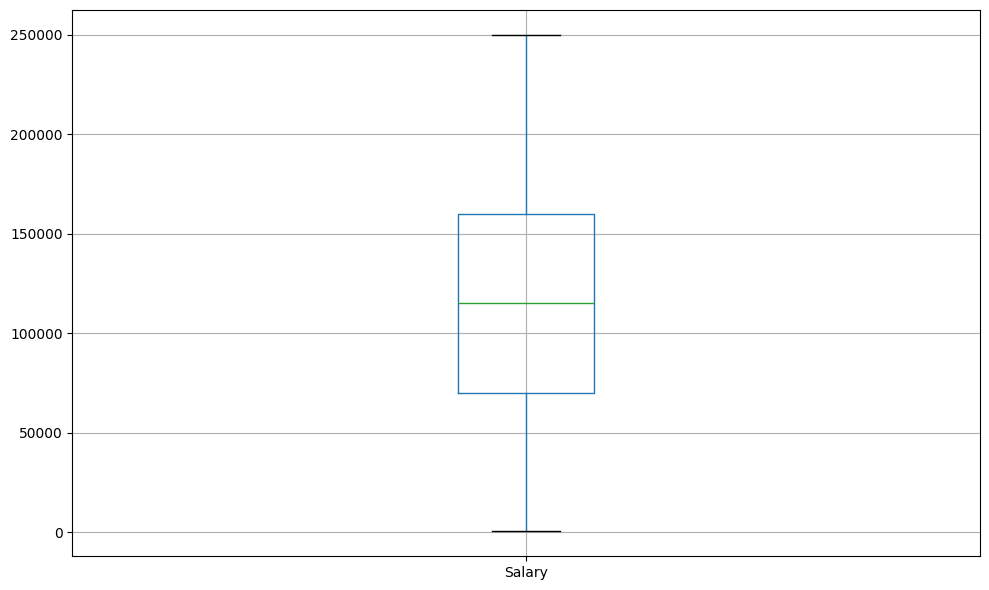

Age's upper outliers:
1209    61.0
1221    57.0
1223    62.0
1234    62.0
1238    55.0
        ... 
3041    54.0
3050    54.0
3067    54.0
3087    54.0
3103    54.0
Name: Age, Length: 119, dtype: float64
Years of Experience's upper outliers:
2382    30.0
2387    28.0
2391    33.0
2393    27.0
2396    33.0
        ... 
3059    26.0
3067    32.0
3087    30.0
3103    28.0
3109    26.0
Name: Years of Experience, Length: 69, dtype: float64


In [8]:
# find outliers with boxplot
df.boxplot(column=['Age', 'Years of Experience'], figsize=(10, 6))
plt.tight_layout()
plt.show()

# salary graphed in a different graph because it has larger values
df.boxplot(column=['Salary'], figsize=(10, 6))
plt.tight_layout()
plt.show()

# find outliers in data (use code from discussion 1)
col_to_graph =['Age', 'Years of Experience', 'Salary']
for feature in col_to_graph:  # calculate for each of the identified attributes
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1 #interquartile range: i.e. the box of the boxplot.
    lower_bound = q1 - 1.5 * iqr #lower line.
    upper_bound = q3 + 1.5 * iqr #upper line.
    #modify outliers to values.
    outliers_lower = df[feature] < lower_bound
    outliers_upper = df[feature] > upper_bound

    # print the outliers
    if outliers_upper.any():
        print(f"{feature}'s upper outliers:\n{df.loc[outliers_upper, feature]}")
    if outliers_lower.any():
        print(f"{feature}'s lower outliers:\n{df.loc[outliers_lower, feature]}")

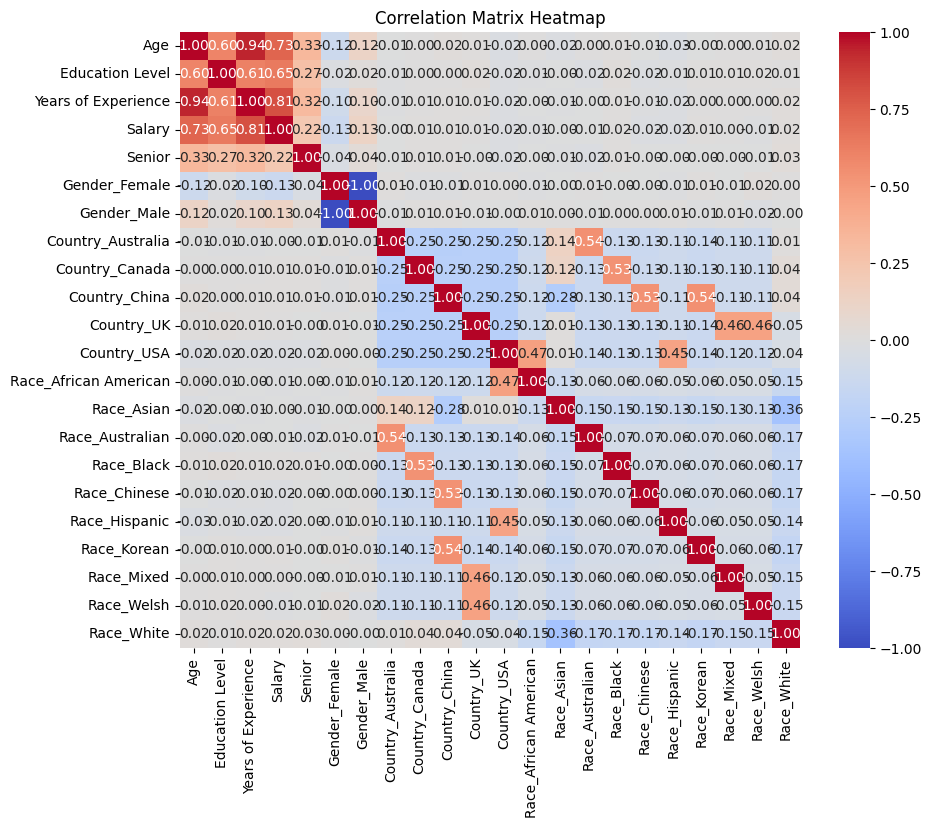

In [11]:
# finding correlation

# using normalized_X does not work because it is a numpy array
# data standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# normalized_X = scaler.fit_transform(X)
# normalized_Y = scaler.fit_transform(y)


# find correlation (use code from lab 0)
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# feature selection
# eliminate features that are highly correlated to reduce overfitting and improve the overall accuracy of the model

# example: eliminate either age or years of experience because they have a correlation of 0.94
# X = X.drop(columns=['Age'])

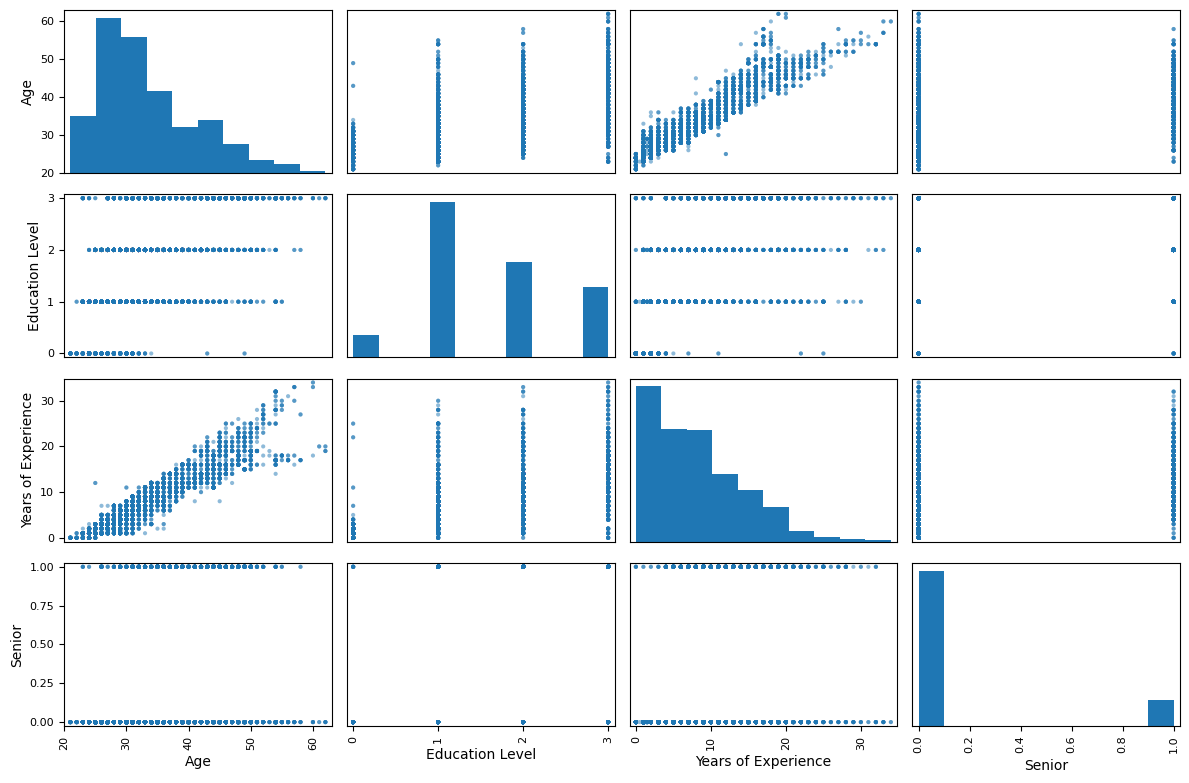

In [14]:
pd.plotting.scatter_matrix(X, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [8]:
X

,Education Level,Years of Experience,Senior
0,1,5.0,0
1,2,3.0,0
2,3,15.0,1
3,1,7.0,0
4,2,20.0,0
...,...,...,...
6679,3,20.0,0
6680,0,3.0,0
6681,1,4.0,0
6682,2,14.0,0
